In [18]:
import fiona
import rasterio
import rasterio.mask
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# read in a polygon draws in Global Mapper and saved as a .shp file
with fiona.open("test_shape.shp", "r") as shapefile:
    features = [feature["geometry"] for feature in shapefile]


In [19]:
print(features)

[{'type': 'Polygon', 'coordinates': [[(376408.42578686733, 4625461.911159394), (376541.2650461267, 4625331.980789023), (376697.3754164971, 4625235.98745569), (376884.5139350157, 4625136.115603838), (377017.35319427506, 4625067.271900134), (377087.1665276084, 4624987.762270505), (377064.86504612694, 4624885.951159393), (377038.6850461269, 4624871.406714949), (376949.47912020097, 4624922.79708532), (376863.1820831639, 4624938.311159394), (376740.03912020085, 4625068.241529765), (376553.8702313119, 4625114.783751986), (376384.1850461266, 4625276.711900135), (376301.76652760804, 4625378.523011246), (376408.42578686733, 4625461.911159394)]]}]


In [25]:
# read in a raster and mask it
# the nodata regions that are cropped out can be declared nans or assigned a value. Global Mapper uses -32767.
with rasterio.open("zmean.tif") as src:
    out_image, out_transform = rasterio.mask.mask(src, features,
                                                        crop=False, nodata=float('nan'))
    out_meta = src.meta.copy()
    
print(np.shape(out_image))

(1, 6800, 8000)


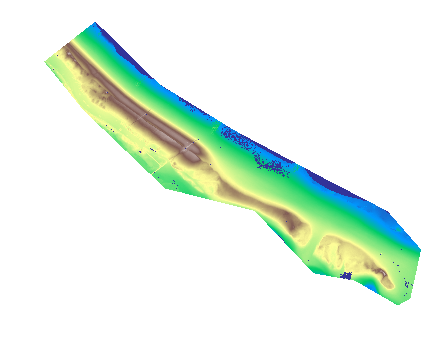

In [26]:
plt.subplots(figsize=(12,6))
plt.axis('off');plt.imshow(out_image[0][:][:],cmap=plt.cm.terrain,vmin=-2,vmax=8)